## Introduction:

There is a big online store. Where me as an analyst need to work together with the marketing department and prioritize the given hypotheses, launch an A/B test, and analyze the results.

What is need to be done :

1. Prepare the data for analysis

2. Prioritize hypotheses

3. Interpret the resulting graphs

4. Calculate statistical significance

5. Draw conclusions based on the A/B test results


Goal of the project :

We will find out which hypothesis and which group out of 'A' & 'B' will be finalized for the A/B testing.

## Pre-processing the data:

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import norm
import math as mt
from math import factorial
import seaborn as sns
import warnings
from datetime import date, timedelta
import datetime as dt

In [2]:
# assigning variable names to all the datasets
hypothesis_data = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders_data = pd.read_csv('/datasets/orders_us.csv')
visits_data = pd.read_csv('/datasets/visits_us.csv')

In [3]:
# displaying the 'hypothesis_data' dataframe
display(hypothesis_data.head(10))

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypothesis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# converting column names to lower case letters
hypothesis_data.columns = hypothesis_data.columns.str.lower()
hypothesis_data

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
# displaying the 'orders_data' dataframe and getting first 10 rows
orders_data.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [7]:
# getting the general information of the dataframe
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
# checking for the duplicate values in the dataframe
orders_data.duplicated().sum()

0

In [9]:
# checking for any missing values in the dataframe
orders_data.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
# making sure no visitor is listed in both the groups
orders_data_new = orders_data.drop_duplicates(['visitorId','group'])


In [11]:
# out of 1197 rows 1089 rows remained which means 108 rows were eliminated
orders_data_new.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [12]:
# checking the number of unique values in 'group' column of dataframe
orders_data_new.group.value_counts()

B    586
A    503
Name: group, dtype: int64

In [13]:
# checking the number of unique values in 'revenue' column of dataframe
orders_data.revenue.value_counts().head(10)

20.2      28
40.2      25
10.2      19
25.5      19
20.8      18
          ..
615.3      1
25.1       1
485.3      1
3120.1     1
355.5      1
Name: revenue, Length: 403, dtype: int64

In [14]:
# getting the numerical statistics of the dataframe
orders_data_new.describe()

,transactionId,visitorId,revenue
count,1.089000e+03,1.089000e+03,1089.000000
mean,2.158859e+09,2.141726e+09,132.841414
std,1.227948e+09,1.234017e+09,630.038619
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.060342e+09,20.800000
50%,2.142285e+09,2.156257e+09,50.100000
75%,3.256245e+09,3.166175e+09,130.800000
max,4.293856e+09,4.283872e+09,19920.400000


In [15]:
# checking if any of the visitors had 0 revenue
orders_data_new.query('revenue==0')['visitorId'].count()

0

In [16]:
# checking if any of the transactions had 0 revenue
orders_data_new.query('revenue==0')['transactionId'].count()

0

In [17]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [18]:
# converting 'date' to datetime data type
orders_data_new['date'] = orders_data_new['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [19]:
# resetting the index without adding additional column
orders_data_new.reset_index(inplace=True,drop=True)


In [20]:
# converting column names to lower case letters
orders_data_new.columns = ['transaction_id','visitor_id','date','revenue','group']
orders_data_new.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1084,3592955527,608641596,2019-08-14,255.7,B
1085,2662137336,3733762160,2019-08-14,100.8,B
1086,2203539145,370388673,2019-08-14,50.1,A
1087,1807773912,573423106,2019-08-14,165.3,A


In [21]:
# displaying first 10 rows of the dataset
visits_data.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [22]:
# displaying last 10 rows of the dataset
visits_data.tail(10)

,date,group,visits
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [23]:
# getting the general information of the dataframe
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [24]:
# checking for the duplicate values in the dataframe
visits_data.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [25]:
# checking for any missing values in the dataframe
visits_data.duplicated().sum()

0

In [26]:
# getting the numerical statistics of the dataset
visits_data.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [27]:
# checking the number of unique values in 'group' column of dataframe
visits_data.group.value_counts()

A    31
B    31
Name: group, dtype: int64

In [28]:
# converting 'date' to datetime data type
visits_data['date'] = visits_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [29]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Conclusion:

There are 3 datasets available which represents the hypothesis, orders and visits data required for the A/B testing. They are named as hypothesis_data, orders_data and visits_data:

1. The hypothesis_data dataframe has 9 rows and 5 columns which represent the hypothesis, which needs to be analysed further so that it can be implemented in in uplifting the revenue and growth of the business. It has 10 rows and 5 columns and clearly the data is ready to be processed.

2. The orders_data dataframe has 1197 entries and 5 columns representing the details of orders made by the users. The date column needs to be changed to datetime datatype where as other parameters have appropriate data types. To make sure there aren't any unusual issues in the data I made sure that the dataframe has no missing values, overall duplicates, none of their revenue is Zero and also most vital point 'some of the visitors might have gotten into both group A and group B' and found out that nearly 108 rows were falsely listed. So, i decided to drop them off so that our data isn't adversely effected and formed a new data frame "orders_data_new" with 1089 entries and 5 columns.

3. Coming to the visits_data, it has 62 entries and 3 columns representing the number of visits per date categorized in to two groups A & B. The date column needs to be changed to datetime datatype where as other parameters have appropriate data types.To make sure there aren't any unusual issues in the data I made sure that the dataframe has no missing values, overall duplicates and also checked the number of unique values of the groups and observed that they were divided in 31 entries each. 

## Prioritizing Hypotheses:

In [30]:
# applying the ICE framework to prioritize hypotheses and sorting them in descending order of priority
hypothesis_data['ICE'] = ((hypothesis_data['impact'] * hypothesis_data['confidence'] ) / hypothesis_data['effort'])
hypothesis_data.sort_values(by='ICE',ascending=False,inplace=True)


In [31]:
# resetting the index
hypothesis_data.reset_index(inplace=True,drop=True)

In [32]:
hypothesis_data

,hypothesis,reach,impact,confidence,effort,ICE
0,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
1,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
2,Add a subscription form to all the main pages....,10,7,8,5,11.200000
3,Show banners with current offers and sales on ...,5,3,8,3,8.000000
4,Add product recommendation blocks to the store...,8,3,7,3,7.000000
5,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
6,Add a customer review page. This will increase...,3,2,2,3,1.333333
7,Change the category structure. This will incre...,8,3,3,8,1.125000
8,Change the background color on the main page. ...,3,1,1,1,1.000000


In [33]:
# applying the 'RICE' framework to the hypothesis and sorting the values
hypothesis_data['RICE'] = (hypothesis_data['reach'] *
                           hypothesis_data['impact'] *
                           hypothesis_data['confidence'] )/ hypothesis_data['effort']

hypothesis_data.sort_values(by='RICE',ascending=False,inplace=True)
hypothesis_data.reset_index(inplace=True,drop=True)
hypothesis_data

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
1,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
2,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
3,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
4,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
5,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
6,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
7,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
8,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


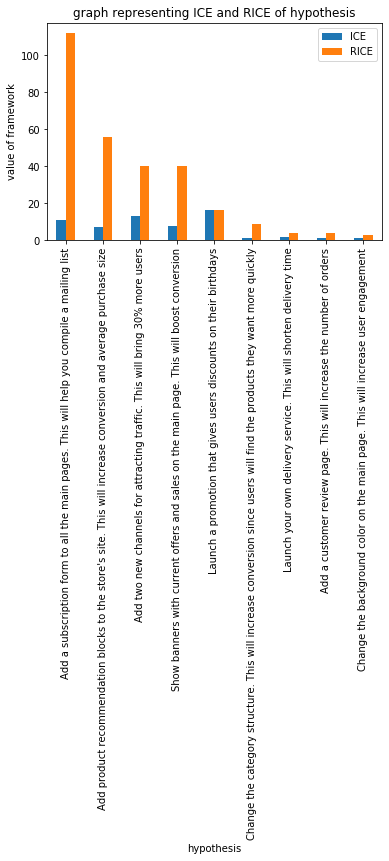

In [34]:
# plotting a graph to show thr 'ICE' and 'RICE' frameworks showing priorities of corresponding hypothesis
hypothesis_data.plot( x='hypothesis',y=["ICE", "RICE"], kind="bar")
plt.title('graph representing ICE and RICE of hypothesis')
plt.legend()
plt.ylabel('value of framework');

### Conclusion:

The above graph shows the evaluated values of 'ICE' and 'RICE' frameworks to the hypothesis. 

When we consider the result of 'ICE' :

The higest priority was given to the hypothesis suggesting to launch a promotion that  gives users discounts on their birthday, followed by the hypothesis stating adding 2 new channels for attracting new traffic which promises a result of 30% increase in users and the third hypothesis being , addition of a subscription form to the main pageswhich helps in compiling a mailing list.

When we consider the result of 'RICE':

The higest priority was given to the hypothesis suggesting addition of a subscription form to the main pages which helps in compiling a mailing list, followed by adding product recommendation blocks to the store size which will increase conversion and average purchase size and the third hypothesis being , to show current sales and offers on the main page which can boost conversion.

Reason for changes in prioritization of hypothesis :

The affect on the number of users is higher with the hypothesis of 'addition of a subscription form to the main pages','adding product recommendation blocks' and 'show current sales and offers on the main page' where as the the stronger impact on the users is higher with the hypothesis of 'launch a promotion that  gives users discounts on their birthday','adding 2 new channels for attracting new traffic' and 'addition of a subscription form to the main pages'. These changes may be due to the fact that the higher the reach is there is more chance of user conversions and the higher the impact is there is more scope to improve the conversion, average product size and may be revenue too.

## A/B Test Analysis:

### Graph cumulative revenue by group:

In [35]:
# building an array with unique paired date-group values
datesGroups = orders_data_new[['date', 'group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(
    lambda x: orders_data_new[
        np.logical_and(
            orders_data_new['date'] <= x['date'], orders_data_new['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])



In [36]:
# getting aggregated cumulative daily data on visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visits_data[
        np.logical_and(
            visits_data['date'] <= x['date'], visits_data['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])



In [37]:
# merging the two tables into one and changing its column names to descriptive names
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']== 'A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']== 'B'][['date','revenue','orders']]


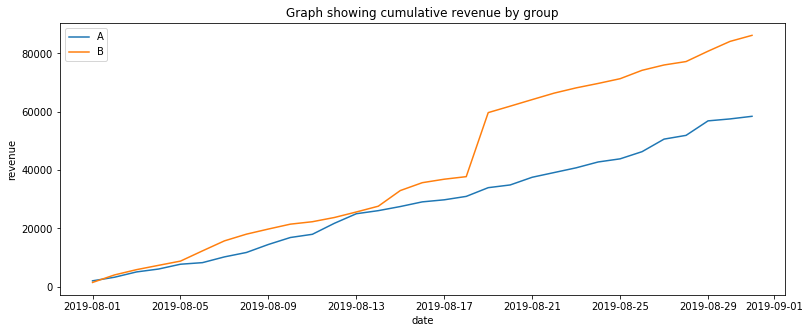

In [38]:
# Plotting the group A anf group B's revenue graph 
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Graph showing cumulative revenue by group')
plt.xlabel('date')
plt.ylabel('revenue')
plt.legend();

From the above graph it seems like group A's revenue is increasing gradually though there is a peak in it at 13th Aug 2019
which may be due to few abnormally high orders placed where as group B's revenue was leading slightly than group A almost half way through. Between 17th Aug to 21st Aug there has been a sudden rise in revenue from almost 40,000 to more than 60,000 bucks which may be due to abnormally high orders placed. We need to get rid of them as we proceed to our final analysis.

### Graph cumulative average order size by group:

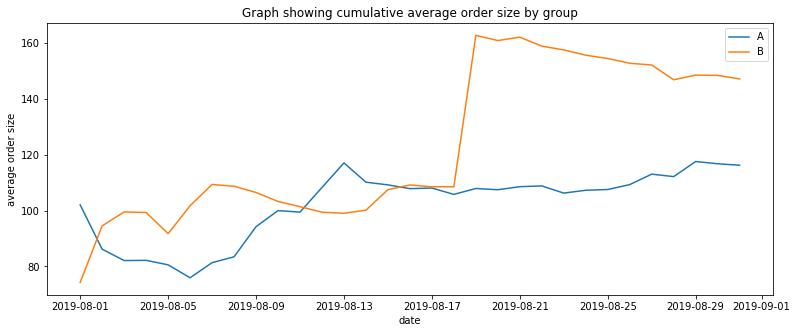

In [39]:
# plotting average order sizes for both group 'A' and 'B'
plt.figure(figsize=(13,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Graph showing cumulative average order size by group')
plt.xlabel('date')
plt.ylabel('average order size')
plt.legend();

We can see that the resulting graph of both the groups is quite fluctuating ! It's quite not possible to make any decisions based on these graphs or we may need to the outliers or anomalies that are causing these distortions in the results.

### Graph the relative difference in cumulative average order size for group B:

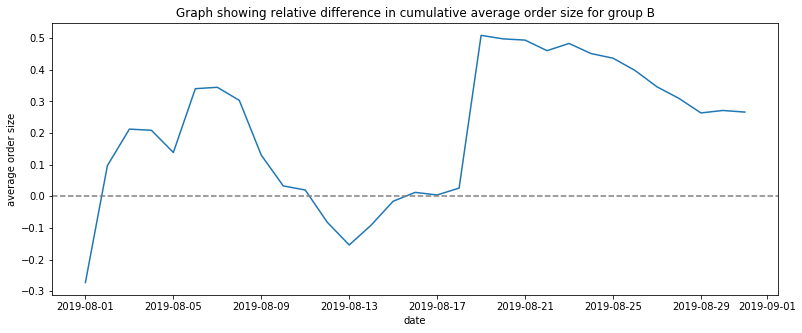

In [40]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(
                                        cumulativeRevenueB,
                                        left_on=['date'], 
                                        right_on =['date'],
                                        suffixes= ['A','B']
                                                    )

# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(13,5))
plt.plot(mergedCumulativeRevenue['date'],
             (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
             )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0,color = 'grey',linestyle='--')
plt.title('Graph showing relative difference in cumulative average order size for group B')
plt.xlabel('date')
plt.ylabel('average order size');

There are too many huge changes in the relative difference in cumulative average order size for group B compared with group A . I guess this definetly has to do something with the abnormally big purchases made.

### Calculating each group's conversion rate as the ratio of orders to the number of visits for each day:

In [41]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group 'A' & 'B'
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [42]:
# getting the numerical statistics of cumulative conversion
cumulativeData['conversion'].describe()

count    62.000000
mean      0.029199
std       0.002303
min       0.025712
25%       0.027072
50%       0.028908
75%       0.031116
max       0.033604
Name: conversion, dtype: float64

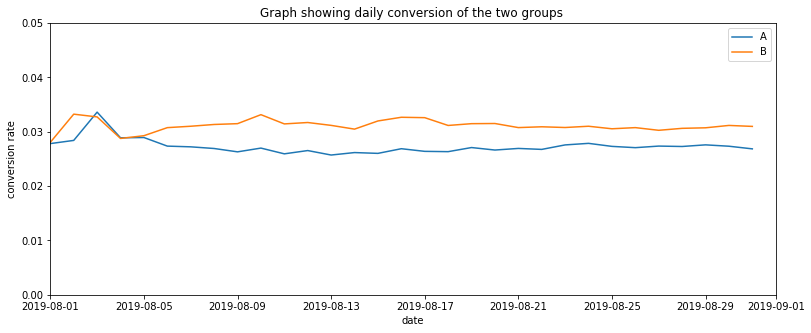

In [43]:
# plotting the graphs
plt.figure(figsize=(13,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Graph showing daily conversion of the two groups ')
plt.xlabel('date')
plt.ylabel('conversion rate')
plt.legend();

# setting the axes' scale based on range 0 to highest conversion rate for clear results
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]);

We can see that in thestarting of test, beginning of first week of August group 'B' had higher conversion rate compared to group 'B'. Where as the conversion rates were almost equal during the end of that week there by group 'B' started gradually increasing than group 'A'and was almost stable. 

The difference between conversion rates of two group is almost 0.25 to 0.33 i.e., 0.8. This shows that group 'B' had 0.8 more conversions than that of group 'A'.

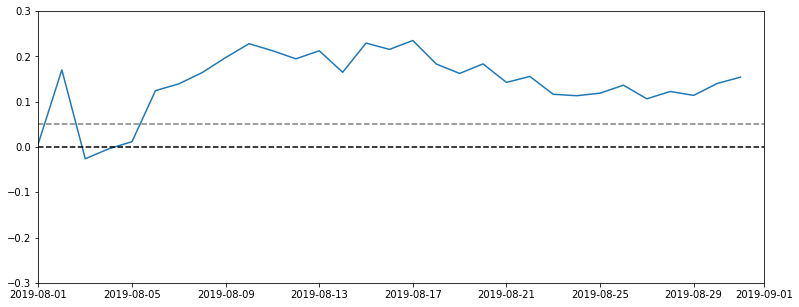

In [44]:
# gathering the data into one DataFrame
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,5))

# plotting the graph
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3]);

At the beginning of the test, group B was low, but then it suddenly took the lead. Then its conversion fell again, and then started growing gradually and was almost steady between 23rd Aug to 29th Aug and there by it's gradually increasing.

### Plot a scatter chart of the number of orders per user

          userId  orders
639   2654030115       2
932   3891541246       2
950   3941795274       2
340   1404934699       2
84     351125977       2
...          ...     ...
357   1476256851       1
358   1476741193       1
359   1484903144       1
360   1485964287       1
1030  4283872382       1

[1031 rows x 2 columns]


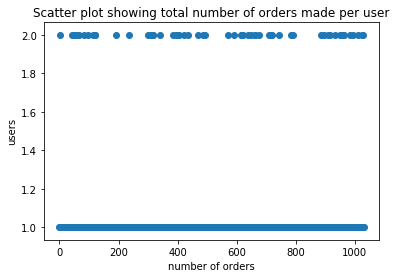

In [45]:
# getting the total number of orders made per user
ordersByUsers = (
    orders_data_new.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# the range of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Scatter plot showing total number of orders made per user')
plt.xlabel('number of orders')
plt.ylabel('users');

Most of the users made only one order where as rest of the users made 2 orders. I think this is quite common to make one to two orders per user because mostly people come and place their order and leave.. In few other cases if they forget to order something or to get some kid of discounts they make place two orders if their worth is more than usual.

### Calculate the 95th and 99th percentiles for the number of orders per user

In [46]:
# Calculating the 95th and 99th percentiles for the number of orders per user
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 2.])

When we calculated the precentile for number of orders per user we see that not more than 5% users and 1% users had placed more than 2 orders. Now we can say that users who placed orders more than two can be treated as an anomaly.

 Let's check the price of each order and see if we can find something there.



### Plotting scatter chart of order prices

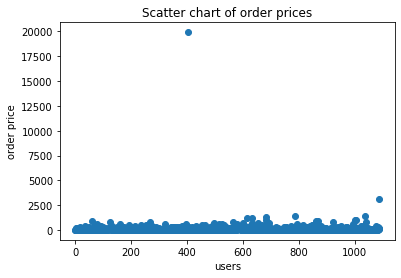

In [47]:
# sorting the values and plotting scatter plot
orders_data_new.sort_values(by='revenue',ascending=False).head(10)

x_values = pd.Series(range(0,len(orders_data_new['revenue'])))

plt.scatter(x_values, orders_data_new['revenue'])
plt.title('Scatter chart of order prices')
plt.ylabel('order price')
plt.xlabel('users');

From the scatter plot it is pretty clear that maximum number of orders placed were below 1000 dollars where as there are very few orders that costed almost 2000 dollars where only 2 orders were reported to have the highest price to be almost 20,000 dollars and almost more than 3000 dollars respectively.

### Calculating the 95th and 99th percentiles of order prices:

In [48]:
# Calculating the 95th and 99th percentiles of order prices
np.percentile(orders_data_new['revenue'], [90, 95, 99])

array([285.02 , 431.66 , 908.704])

When we calculate the 95th and 99th percentiles of the prices of orders we see that not more than 5% of users placed orders that costs more than 432 dollars and not more than 1% placed orders more expensive than almost 910 dollars. 

Any orders made with price more than 910 dollars can now be considered as an anomaly.

### Statistical significance of the difference in conversion between the groups - raw data:

In [49]:
# creating the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders']
ordersByUsersA = orders_data_new[orders_data_new['group']=='A'].groupby('visitor_id',as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_data_new[orders_data_new['group']=='B'].groupby('visitor_id',as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

#### Formulating null and alternative hypothesis:

Here the null hypothesis 'Ho' can be defined as ,

"There isn't any statistically significant difference in conversion parameter  between the two group 'A' and 'B'".

There by the alternative hypothesis 'Ha' will be that, 

"There is a statistically significant difference in conversion parameter  between the two group 'A' and 'B'".

In [50]:
# preparing the samples for the Mann-Whitney test
sampleA = pd.concat(
                    [ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(
                     visits_data[visits_data['group']=='A']['visits'].sum() - len(
                         ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
                    [ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(
                     visits_data[visits_data['group']=='B']['visits'].sum() - len(
                         ordersByUsersB['orders'])), name='orders')],axis=0)

# calculating the p-value and the relative difference
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.00837
0.154


The p-value obtained is 0.00837 which is considerably less than the level of significance i.e., 0.05 so we reject the null hypothesis. The analysis from the raw data shows that the conversion rates of both the group are significantly different.

The relative conversion gain for group 'B' compared with group 'A' is 15.4 %

### Statistical significance of the difference in average order size - raw data:

#### Formulating null and alternative hypothesis:

Here the null hypothesis 'Ho' can be defined as ,

"There isn't any statistically significant difference in average order size parameter  between the two group 'A' and 'B'".

There by the alternative hypothesis 'Ha' will be that, 

"There is a statistically significant difference in average order size parameter  between the two group 'A' and 'B'".

In [51]:
# calculating the p-value and the relative difference
print('{0:.3f}'.format(
                  stats.mannwhitneyu(
                      orders_data_new[orders_data_new['group']=='A']['revenue'],
                      orders_data_new[orders_data_new['group']=='B']['revenue'])[1]))


print('{0:.3f}'.format(
    orders_data_new[orders_data_new['group']=='B']['revenue'].mean()/
    orders_data_new[orders_data_new['group']=='A']['revenue'].mean()-1)) 

0.466
0.266


The p-value is much greater than the level of significance which means that we can't reject the null hypothesis, so there no statistically significant differences in the average size of orders  between the groups 'A' & 'B'.

The relative difference of group 'B' when compared to group 'A' is 26.6%.

###  Statistical significance of the difference in conversion between the groups - filtered data

In [52]:
# making data slices with the users who placed more than 3 orders (usersWithManyOrders) and
# the users who placed orders for more than $910 (usersWithExpensiveOrders) and 
# joining them into a table (abnormalUsers)
usersWithManyOrders = pd.concat(
                        [ordersByUsersA[
                            ordersByUsersA['orders'] >= 3]['userId'],
                         ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders_data_new[orders_data_new['revenue'] > 910]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)



1002     148427295
868      887908475
683      888512513
1004    1164614297
1036    1307669133
dtype: int64

In [53]:
# find the total number of anomalous users using the shape() method
abnormalUsers.shape

(10,)

We have 10 abnormal users in total!

#### Formulating null and alternative hypothesis:

Here the null hypothesis 'Ho' can be defined as ,

"There isn't any statistically significant difference in conversion parameter between the two group 'A' and 'B'".

There by the alternative hypothesis 'Ha' will be that,

"There is a statistically significant difference in conversion parameter between the two group 'A' and 'B'".

In [54]:
# preparing the samples from filtered data for Mannwhitney test
sampleAFiltered = pd.concat(
                    [ordersByUsersA[
                    np.logical_not(
                    ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                    pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() -
                                                 len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
                    [ordersByUsersB[
                    np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                    pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - 
                                                 len(ordersByUsersB['orders'])),name='orders')],axis=0)

# calculating the p-value and the relative difference
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.00681
0.160


Here the p-value is 0.0068 which is much less than the significance level 0.05 so we reject the null hypothesis. There by proving that the statistical significant difference between the conversions of two groups isn't same.

we can see that group 'B' has much better conversion of 16% more than group 'A'.

### Statistical significance of the difference in average order size between the groups - filtered data:

#### Formulating null and alternative hypothesis:

Here the null hypothesis 'Ho' can be defined as ,

"There isn't any statistically significant difference in average order size parameter between the two group 'A' and 'B'".

There by the alternative hypothesis 'Ha' will be that,

"There is a statistically significant difference in average order size parameter between the two group 'A' and 'B'".

In [55]:
# calculating the p-value and the relative difference
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_data_new[np.logical_and(
        orders_data_new['group']=='A',
        np.logical_not(orders_data_new['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders_data_new[np.logical_and(
        orders_data_new['group']=='B',
        np.logical_not(orders_data_new['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_data_new[np.logical_and(orders_data_new['group']=='B',
                                   np.logical_not(orders_data_new['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_data_new[np.logical_and(orders_data_new['group']=='A',
                                   np.logical_not(orders_data_new['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.442
0.028


The p - value is higher than the level of significance i.e.,  as it is 0.442. We donot reject the null hypothesis , the statistically significant difference between the two groups is the same.

The relative gain of group 'B' is 2.8% more than group 'A' which is definitely more effective than before now that all the outliers are removed and data is pretty clean.

## Test results and Overview of analysis:

We conclude that  group B scored higher in conversion metric and the difference was statistically significant and it scored higher in average order size too and the difference wasn't statistically significant . Moreover, the conversion graph indicates that the result is stable. 

So far what we've done and noticed in the analysis are as follows :

1. We we're given 3 datasets which represents the hypothesis, orders and visits data required for the A/B testing. They are named as hypothesis_data, orders_data and visits_data. All the datasets were thoughroughly examined and prepared for the further analysis by checking missing values, duplicates, datatypes and all. We found few visitors i.e., about 108 that were included in both the groups which isn't acceptable so they were eliminated from the dataset and new data set orders_data_new was formed. This elimination might hae affected the conversion to some extent.

2. According to 'ICE' and 'RICE' frameworks,the affect on the number of users is higher with the hypothesis of 'addition of a subscription form to the main pages','adding product recommendation blocks' and 'show current sales and offers on the main page' where as the the stronger impact on the users is higher with the hypothesis of 'launch a promotion that gives users discounts on their birthday','adding 2 new channels for attracting new traffic' and 'addition of a subscription form to the main pages'. These changes may be due to the fact that the higher the reach is there is more chance of user conversions and the higher the impact is there is more scope to improve the conversion, average product size and may be revenue too.

3. Before removing the anomalies,the cumulative revenue by group 'B' was a bit more than group 'A', where as the cumulative order size of group 'A' was gradually increasing and of group 'B' was fluctuating anf also  hit peaks during second half of the test.

4. There are too many huge changes in the relative difference in cumulative average order size for group B compared with group A . I guess this definetly has to do something with the abnormally big purchases made. The difference between conversion rates of two group is almost 0.25 to 0.33 i.e., 0.8. This shows that group 'B' had 0.8 more conversions than that of group 'A'.

5. The minimum number of orders made were 1 and maximum were 2 rest could be considered to be anomalies, where as the price ranged from 285 to 910 dollars and rest could be considered as outliers.

6. The analysis from the raw data shows that the conversion rates of both the group are significantly different.The relative conversion gain for group 'B' compared with group 'A' is 15.4 % and there is no statistically significant differences in the average size of orders between the groups 'A' & 'B'.The relative difference of group 'B' when compared to group 'A' is 26.6%.

7. The analysis from the filtered data shows that There by proving that the statistical significant difference between the conversions of two groups isn't same.We can see that group 'B' has much better conversion of 16% more than group 'A'. The statistically significant difference in the average size of orders between the two groups is the same.The relative gain of group 'B' is 2.8% more than group 'A' which is definitely more effective than before.

Finally, we can now stop the test, call it a success, and move on to your next hypothesis.